## Task Ideas:
1. Analyze the most in-demand software engineering job titles.
2. Explore the geographical distribution of software engineering job opportunities.
3. Identify the most sought-after programming languages and skills in job descriptions.
4. Determine the average years of experience required for different job levels.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
jobPostings = pd.read_csv('data/jobs.csv')
jobPostings2 = pd.read_csv('data/postings.csv')

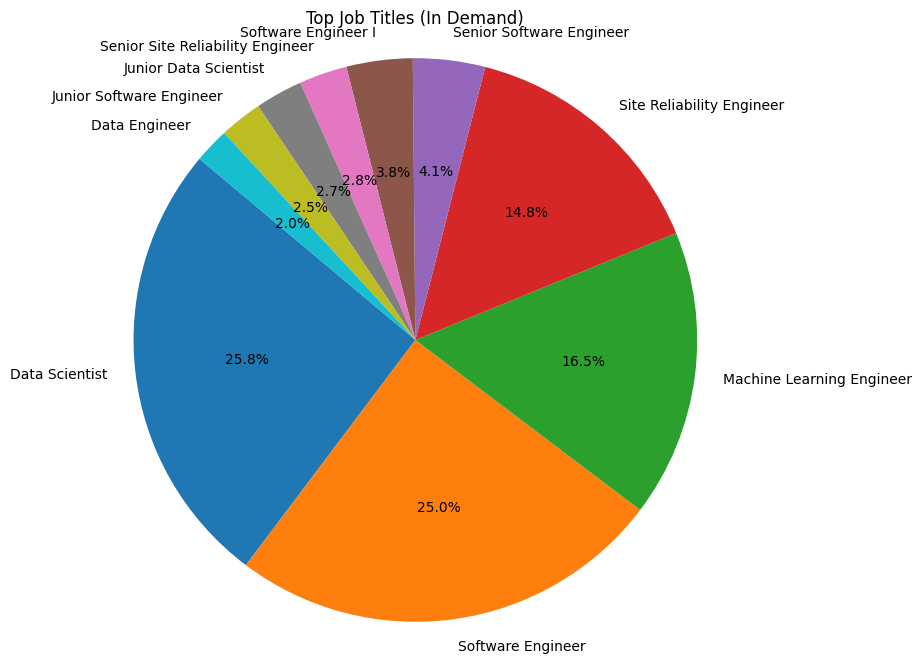

In [30]:


jobPostings = pd.read_csv('data/jobs.csv')

# jobPostings.head
job_title_counts = jobPostings["title"].value_counts()
job_title_counts = job_title_counts.sort_values(ascending=False)
top_n_titles = job_title_counts.head(10)

labels = top_n_titles.index.to_numpy()
sizes = top_n_titles.to_numpy()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Top Job Titles (In Demand)")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart
plt.show()



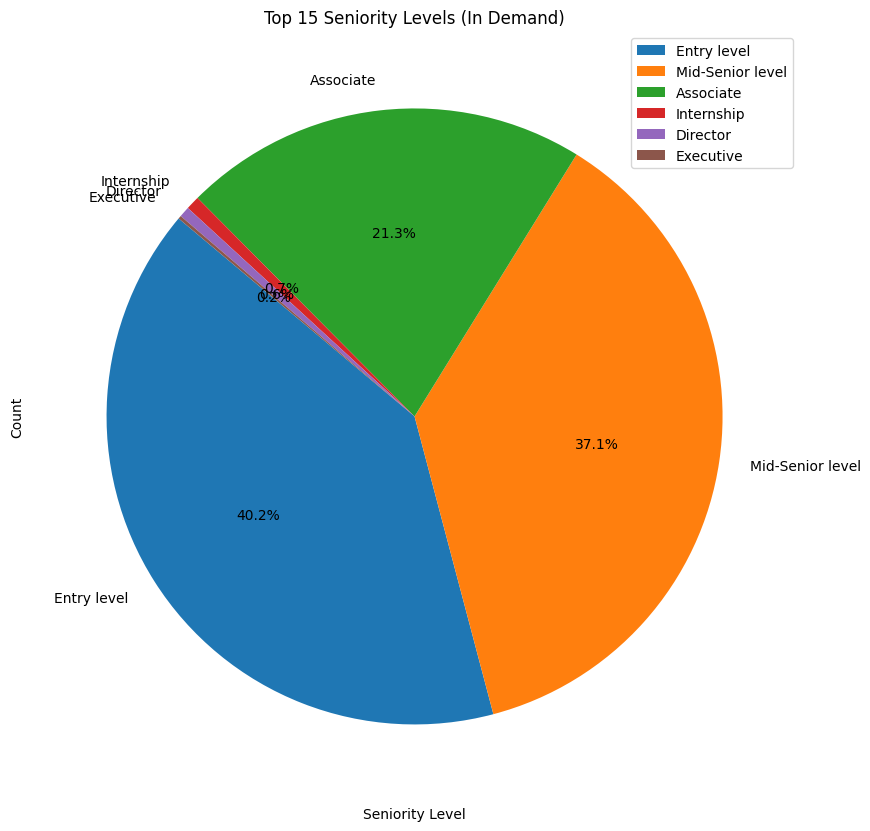

In [47]:
level_count = jobPostings["Seniority level"].value_counts()
level_count = level_count.sort_values(ascending=False)
top_levels = level_count.head(10)
top_levels = top_levels.drop('Not Applicable')

# Make a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_levels.to_numpy(), labels=top_levels.index.to_numpy(), autopct="%1.1f%%", startangle=140)  # Use index for x-axis labels
plt.xlabel("Seniority Level")
plt.ylabel("Count")
plt.legend()
plt.title("Top 15 Seniority Levels (In Demand)")
plt.show()

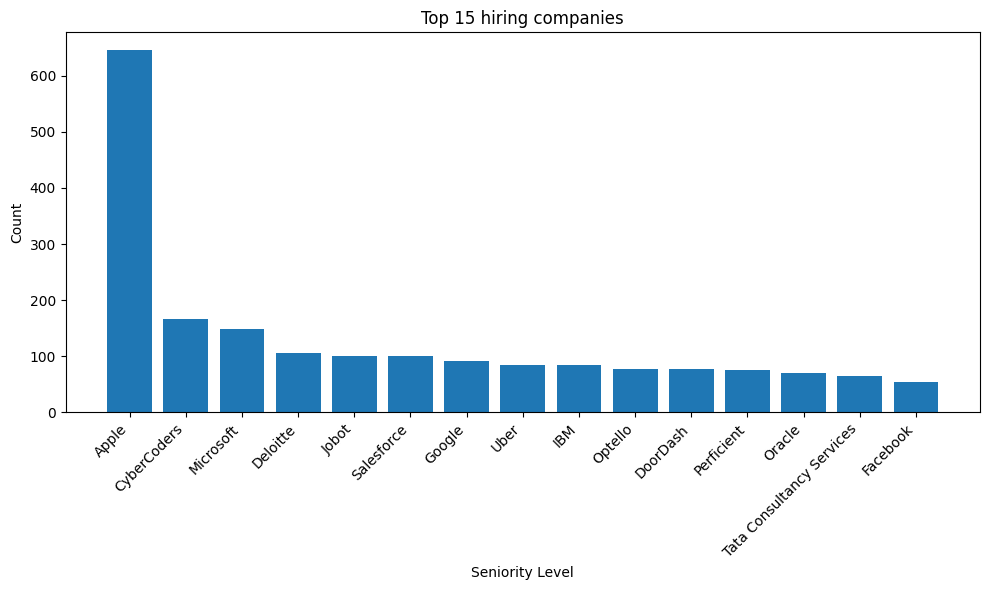

In [49]:
company_count = jobPostings["company"].value_counts()
company_count = company_count.sort_values(ascending=False)
top_companies = company_count.head(15)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_companies.index, top_companies.to_numpy())
plt.xlabel("Seniority Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.title("Top 15 hiring companies")
plt.tight_layout()
plt.show()

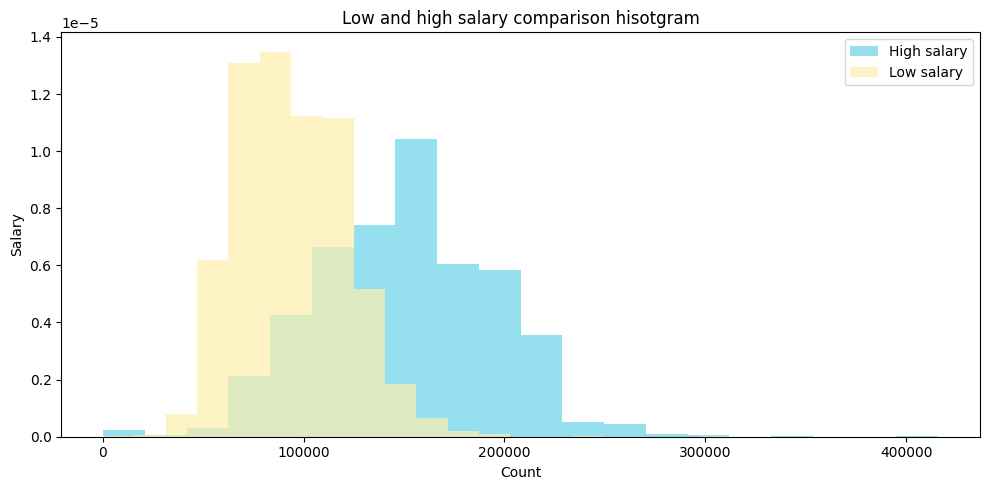

In [52]:


high_salary = jobPostings["sal_high"]
low_salary = jobPostings["sal_low"]

# Create a line chart
plt.figure(figsize=(10, 5))
plt.hist(high_salary, density=100, alpha = 0.7, bins=20, label='High salary',color='#68D2E8')
plt.hist(low_salary, density=1, alpha = 0.7, bins=20, label='Low salary',color='#FEEFAD')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Salary")
plt.title("Low and high salary comparison hisotgram")
plt.tight_layout()  # Adjust spacing between elements
plt.show()


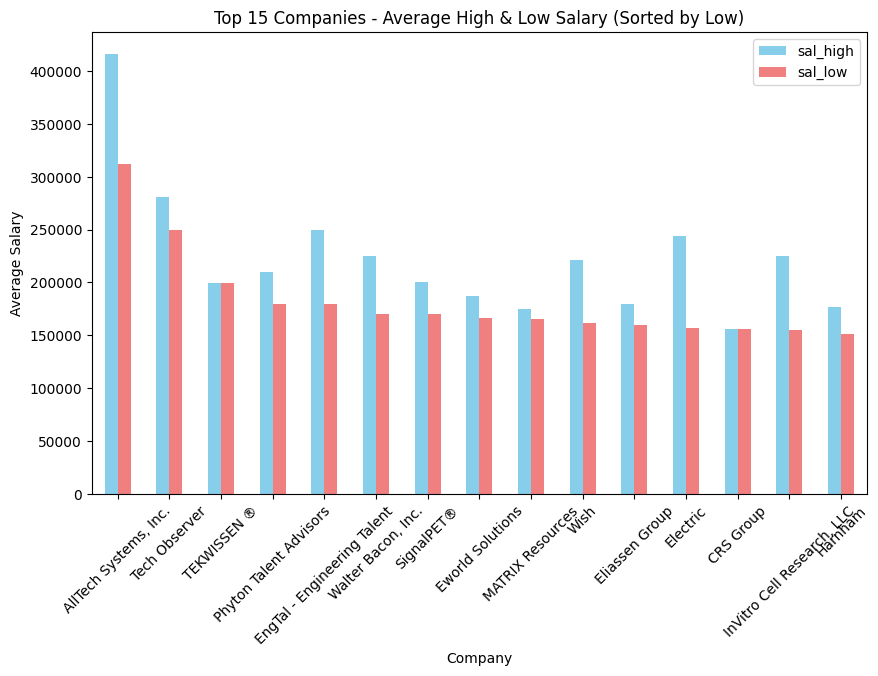

In [85]:

# Group data by company, calculate means, and handle missing values
company_avg_salaries = jobPostings.groupby('company')[['sal_high', 'sal_low']].mean().dropna().sort_values(by='sal_low', ascending=False)

company_avg_salaries = company_avg_salaries.head(15)


company_avg_salaries.plot(kind='bar', y=['sal_high', 'sal_low'], figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.title('Top 15 Companies - Average High & Low Salary (Sorted by Low)')

plt.xticks(rotation=45)

plt.show()

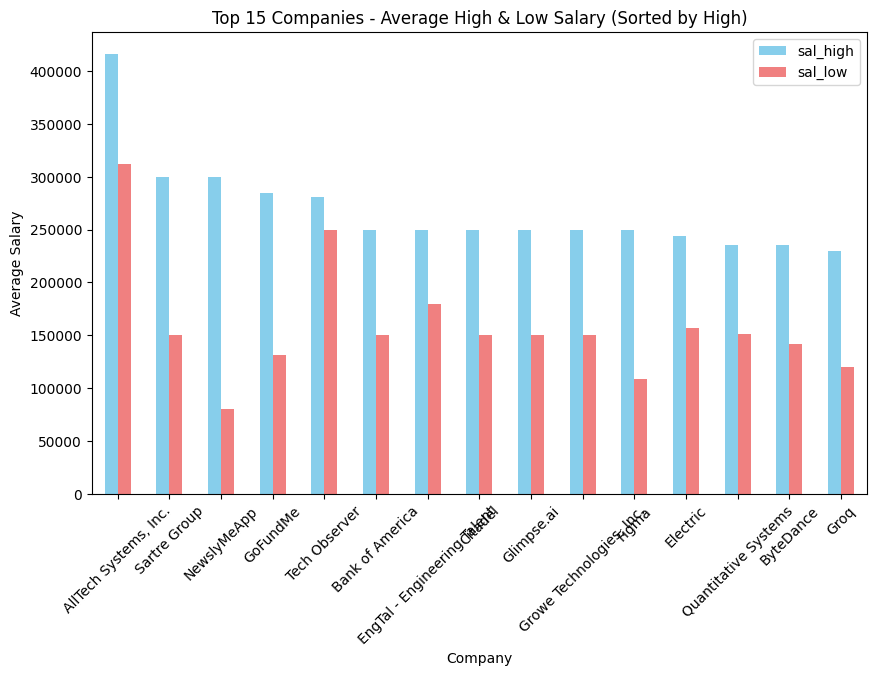

In [84]:

# Group data by company, calculate means, and handle missing values
company_avg_salaries = jobPostings.groupby('company')[['sal_high', 'sal_low']].mean().dropna().sort_values(by='sal_high', ascending=False)

company_avg_salaries = company_avg_salaries.head(15)


company_avg_salaries.plot(kind='bar', y=['sal_high', 'sal_low'], figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.title('Top 15 Companies - Average High & Low Salary (Sorted by High)')

plt.xticks(rotation=45)

plt.show()

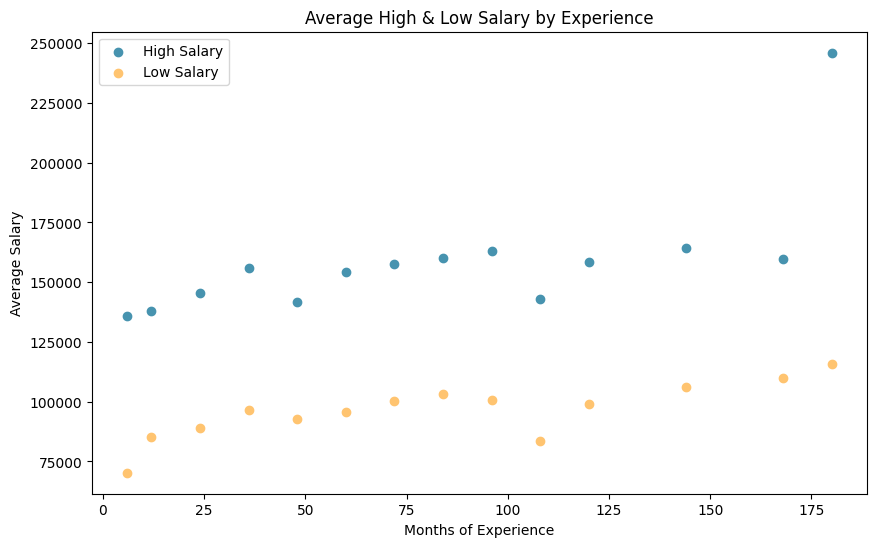

In [72]:
jobPostings_grouped_experience = jobPostings.groupby('months_experience')[['sal_high', 'sal_low']].mean()

plt.figure(figsize=(10, 6))
plt.scatter(jobPostings_grouped_experience.index, jobPostings_grouped_experience['sal_high'], label='High Salary', color='#4793AF')
plt.scatter(jobPostings_grouped_experience.index, jobPostings_grouped_experience['sal_low'], label='Low Salary', color='#FFC470')

plt.xlabel('Months of Experience')
plt.ylabel('Average Salary')
plt.title('Average High & Low Salary by Experience')
plt.legend()
plt.show()

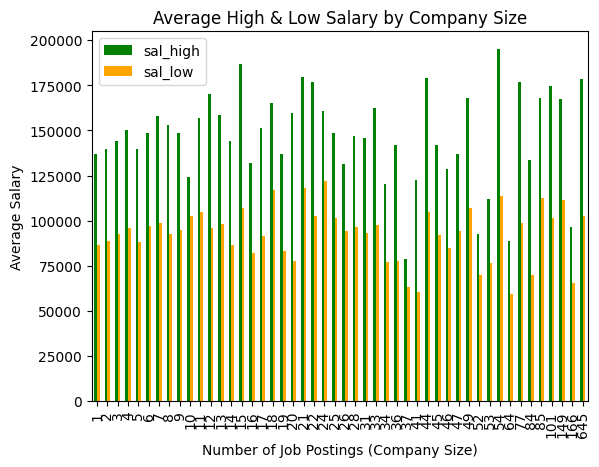

In [80]:
company_post_count = jobPostings.groupby('company')['post_id'].count()

jobPostings_merged = jobPostings.merge(company_post_count.rename('post_count'), how='left', on='company')

jobPostings_grouped_size = jobPostings_merged.groupby('post_count')[['sal_high', 'sal_low']].mean().dropna()


jobPostings_grouped_size.plot(kind='bar', y=['sal_high', 'sal_low'], color=['green', 'orange'])
plt.xlabel('Number of Job Postings (Company Size)')
plt.ylabel('Average Salary')
plt.title('Average High & Low Salary by Company Size')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

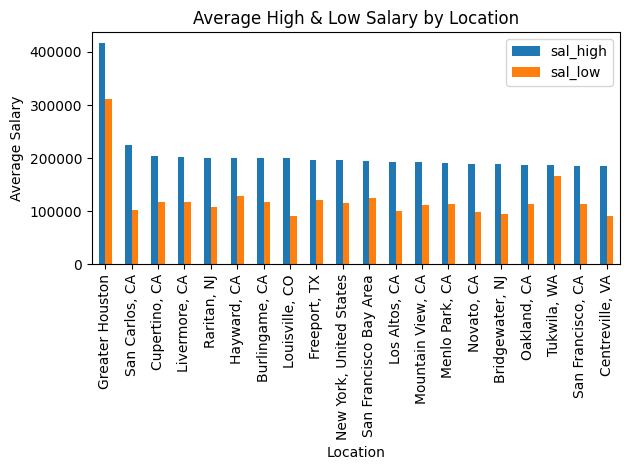

In [33]:
jobPostings_by_location = jobPostings.groupby('location')[['sal_high', 'sal_low']].mean().sort_values(by='sal_high', ascending=False).head(20)

plt.figure(figsize=(12, 6))
jobPostings_by_location.plot(kind='bar', y=['sal_high', 'sal_low'])

# Set labels and title for the plot
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Average High & Low Salary by Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()